Here ill work on the passenger airline satisfaction problem, it`s a binary satisfaction problem with target columns means it`s a supervised ML problem


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import stat as stat
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [14]:
data = pd.read_csv("airline_passenger_satisfaction.csv")

In [15]:
df = data.copy()

In [16]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [18]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
# Now I`ve to remove the ID column because we don`t need the perticular column
df.drop("ID",inplace=True,axis=1)

In [20]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [21]:
columns = df[["Gender","Customer Type","Type of Travel","Class"]]
for i in columns:
    vc=df[i].value_counts()
    print(f"Value counts for {i} is \n{vc}")
    print("----------------------------------")

Value counts for Gender is 
Female    65899
Male      63981
Name: Gender, dtype: int64
----------------------------------
Value counts for Customer Type is 
Returning     106100
First-time     23780
Name: Customer Type, dtype: int64
----------------------------------
Value counts for Type of Travel is 
Business    89693
Personal    40187
Name: Type of Travel, dtype: int64
----------------------------------
Value counts for Class is 
Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64
----------------------------------


In [22]:
# We convert the Depatrure Delay Column minutes to hour 
df["Departure Delay"] = df['Departure Delay'] / 60

In [23]:
# We convert the Arrival Delay Column minutes to hour 
df["Arrival Delay"] = df['Arrival Delay'] / 60

In [24]:
df["Departure Delay"].value_counts()

0.000000    73356
0.016667     3682
0.033333     2855
0.050000     2535
0.066667     2309
            ...  
9.433333        1
8.350000        1
7.666667        1
7.583333        1
5.983333        1
Name: Departure Delay, Length: 466, dtype: int64

In [25]:
df["Arrival Delay"].value_counts()

0.000000     72753
0.016667      2747
0.033333      2587
0.050000      2442
0.066667      2373
             ...  
16.850000        1
6.433333         1
10.400000        1
5.916667         1
6.866667         1
Name: Arrival Delay, Length: 472, dtype: int64

In [26]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,0.033333,0.083333,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,0.433333,0.650000,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0.000000,0.000000,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0.000000,0.000000,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0.000000,0.016667,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,0.033333,0.050000,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0.000000,0.000000,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,0.100000,0.233333,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,0.516667,0.366667,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [27]:
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [28]:
# Fill null values with the mean in the "Arrival Delay" column
mean_arrival_delay = df['Arrival Delay'].mean()
df['Arrival Delay'].fillna(mean_arrival_delay, inplace=True)

In [29]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [30]:
df.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,0.245229,0.251519,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,0.634519,0.640123,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,0.200000,0.216667,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,26.533333,26.400000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [31]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [32]:
df.shape

(129880, 23)

In [33]:
df["Satisfaction"].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [34]:
df["Class"].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [35]:
df["Customer Type"].unique()

array(['First-time', 'Returning'], dtype=object)

In [36]:
df["Type of Travel"].unique()

array(['Business', 'Personal'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoded_df = LabelEncoder()

In [39]:
df["Gender"]= label_encoded_df.fit_transform(df["Gender"])

In [40]:
df["Customer Type"] = label_encoded_df.fit_transform(df["Customer Type"])

In [41]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,Business,Business,821,0.033333,0.083333,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,0,35,1,Business,Business,821,0.433333,0.650000,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,1,41,1,Business,Business,853,0.000000,0.000000,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,1,50,1,Business,Business,1905,0.000000,0.000000,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,0,49,1,Business,Business,3470,0.000000,0.016667,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,Personal,Economy Plus,447,0.033333,0.050000,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,1,41,1,Personal,Economy Plus,308,0.000000,0.000000,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,1,42,1,Personal,Economy Plus,337,0.100000,0.233333,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,1,50,1,Personal,Economy Plus,337,0.516667,0.366667,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [42]:
df["Type of Travel"] = label_encoded_df.fit_transform(df["Type of Travel"])

In [43]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,Business,821,0.033333,0.083333,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,0,35,1,0,Business,821,0.433333,0.650000,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,1,41,1,0,Business,853,0.000000,0.000000,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,1,50,1,0,Business,1905,0.000000,0.000000,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,0,49,1,0,Business,3470,0.000000,0.016667,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,Economy Plus,447,0.033333,0.050000,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,1,41,1,1,Economy Plus,308,0.000000,0.000000,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,1,42,1,1,Economy Plus,337,0.100000,0.233333,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,1,50,1,1,Economy Plus,337,0.516667,0.366667,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [44]:
one_hot_encoded_data = pd.get_dummies(df, columns = ["Class"]) 

In [45]:
one_hot_encoded_data

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,0,0,821,0.033333,0.083333,3,3,4,...,5,5,5,3,5,5,Neutral or Dissatisfied,1,0,0
1,0,35,1,0,821,0.433333,0.650000,2,2,3,...,5,3,5,2,5,5,Satisfied,1,0,0
2,1,41,1,0,853,0.000000,0.000000,4,4,4,...,5,5,3,4,3,3,Satisfied,1,0,0
3,1,50,1,0,1905,0.000000,0.000000,2,2,3,...,4,4,5,2,5,5,Satisfied,1,0,0
4,0,49,1,0,3470,0.000000,0.016667,3,3,3,...,5,4,3,3,3,3,Satisfied,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,447,0.033333,0.050000,4,4,4,...,4,4,5,4,4,4,Neutral or Dissatisfied,0,0,1
129876,1,41,1,1,308,0.000000,0.000000,5,3,5,...,2,2,4,3,2,5,Neutral or Dissatisfied,0,0,1
129877,1,42,1,1,337,0.100000,0.233333,5,2,4,...,3,3,4,2,3,5,Neutral or Dissatisfied,0,0,1
129878,1,50,1,1,337,0.516667,0.366667,4,4,3,...,3,3,4,5,3,5,Satisfied,0,0,1


In [46]:
df["Satisfaction"].value_counts()
#our data is 60% to 40% distributed 

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [47]:
one_hot_encoded_data 

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,0,0,821,0.033333,0.083333,3,3,4,...,5,5,5,3,5,5,Neutral or Dissatisfied,1,0,0
1,0,35,1,0,821,0.433333,0.650000,2,2,3,...,5,3,5,2,5,5,Satisfied,1,0,0
2,1,41,1,0,853,0.000000,0.000000,4,4,4,...,5,5,3,4,3,3,Satisfied,1,0,0
3,1,50,1,0,1905,0.000000,0.000000,2,2,3,...,4,4,5,2,5,5,Satisfied,1,0,0
4,0,49,1,0,3470,0.000000,0.016667,3,3,3,...,5,4,3,3,3,3,Satisfied,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,447,0.033333,0.050000,4,4,4,...,4,4,5,4,4,4,Neutral or Dissatisfied,0,0,1
129876,1,41,1,1,308,0.000000,0.000000,5,3,5,...,2,2,4,3,2,5,Neutral or Dissatisfied,0,0,1
129877,1,42,1,1,337,0.100000,0.233333,5,2,4,...,3,3,4,2,3,5,Neutral or Dissatisfied,0,0,1
129878,1,50,1,1,337,0.516667,0.366667,4,4,3,...,3,3,4,5,3,5,Satisfied,0,0,1


In [48]:
df1 = one_hot_encoded_data.copy()

In [49]:
df1

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,0,0,821,0.033333,0.083333,3,3,4,...,5,5,5,3,5,5,Neutral or Dissatisfied,1,0,0
1,0,35,1,0,821,0.433333,0.650000,2,2,3,...,5,3,5,2,5,5,Satisfied,1,0,0
2,1,41,1,0,853,0.000000,0.000000,4,4,4,...,5,5,3,4,3,3,Satisfied,1,0,0
3,1,50,1,0,1905,0.000000,0.000000,2,2,3,...,4,4,5,2,5,5,Satisfied,1,0,0
4,0,49,1,0,3470,0.000000,0.016667,3,3,3,...,5,4,3,3,3,3,Satisfied,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,447,0.033333,0.050000,4,4,4,...,4,4,5,4,4,4,Neutral or Dissatisfied,0,0,1
129876,1,41,1,1,308,0.000000,0.000000,5,3,5,...,2,2,4,3,2,5,Neutral or Dissatisfied,0,0,1
129877,1,42,1,1,337,0.100000,0.233333,5,2,4,...,3,3,4,2,3,5,Neutral or Dissatisfied,0,0,1
129878,1,50,1,1,337,0.516667,0.366667,4,4,3,...,3,3,4,5,3,5,Satisfied,0,0,1


<Axes: >

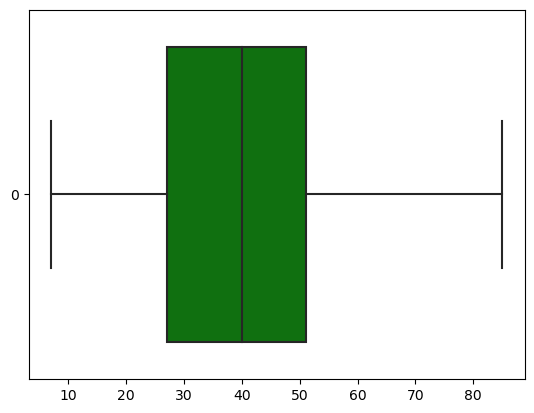

In [50]:
sns.boxplot(df1["Age"],color="g",orient="h")

<Axes: >

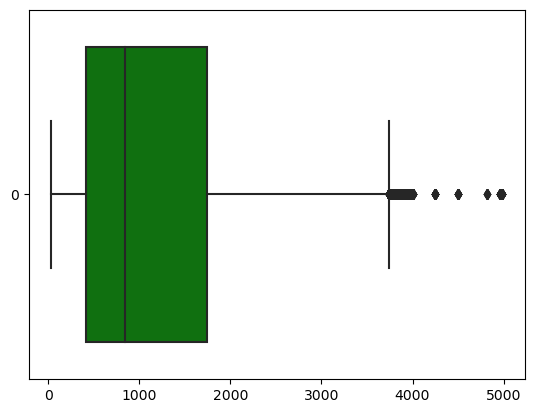

In [51]:
sns.boxplot(df1["Flight Distance"],color="g",orient="h")

In [52]:
# df1["Flight Distance"].mean()

In [53]:
# sns.histplot(df1["Flight Distance"],kde=True)

In [54]:
# from scipy.stats import boxcox

In [55]:
# sns.histplot(np.cbrt(df1["Flight Distance"]),kde=True)


In [56]:
# trfd, lamfd = boxcox(df1["Flight Distance"])

In [57]:
# sns.histplot(trfd,kde=True)

In [58]:
# # Calculate Z-scores
# z_scores = stats.zscore(df1['Flight Distance'])

# # Define a threshold for Z-scores (e.g., 3)
# threshold = 2

# # Identify outliers
# outliers = df1[np.abs(z_scores) > threshold]

# # Remove outliers from the DataFrame
# df_no_outliers = df1[np.abs(z_scores) <= threshold]

# # Display the removed outliers
# print("Removed Outliers:")
# print(outliers)

# # Display the DataFrame without outliers
# print("DataFrame without Outliers:")
# print(df_no_outliers)


In [59]:
# sns.boxplot(df_no_outliers["Flight Distance"],orient="h")

In [60]:
# df_no_outliers.shape

In [61]:
# df_no_outliers.isnull().sum()

In [62]:
# df2=df_no_outliers.copy()

In [63]:
# df2

In [64]:
# df2["Flight Distance"].max()

In [65]:
# sns.histplot(df2["Flight Distance"],kde=True)

In [66]:
# sns.histplot(np.cbrt(df2["Flight Distance"]),kde=True)

In [67]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df1['Flight Distance'].quantile(0.25)
Q3 = df1['Flight Distance'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[(df1['Flight Distance'] < lower_bound) | (df1['Flight Distance'] > upper_bound)]

# Remove outliers from the DataFrame
df_no_outliers = df1[(df1['Flight Distance'] >= lower_bound) & (df1['Flight Distance'] <= upper_bound)]

# Display the removed outliers
print("Removed Outliers:")
print(outliers)

# Display the DataFrame without outliers
print("DataFrame without Outliers:")
print(df_no_outliers)


Removed Outliers:
        Gender  Age  Customer Type  Type of Travel  Flight Distance  \
5            1   43              1               0             3788   
58           0   41              1               0             3997   
148          1   37              1               0             3758   
173          0   39              1               0             3822   
185          1   42              1               0             3880   
...        ...  ...            ...             ...              ...   
129645       1   33              1               0             3951   
129671       1   31              1               0             3800   
129729       0   48              1               0             3801   
129746       1   33              1               0             3935   
129855       0   41              1               0             3926   

        Departure Delay  Arrival Delay  \
5              0.000000       0.000000   
58             0.016667       0.000000   
148

<Axes: xlabel='Flight Distance', ylabel='Count'>

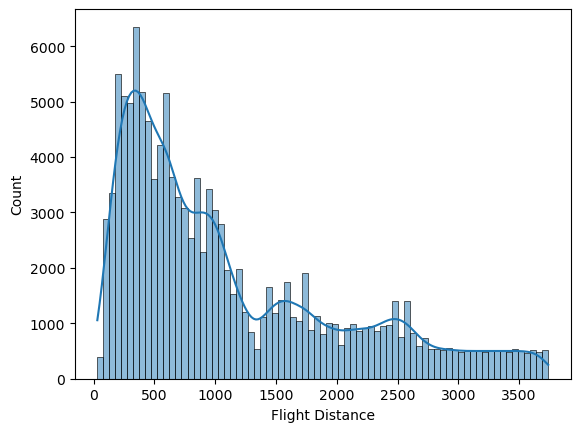

In [68]:
sns.histplot(df_no_outliers["Flight Distance"], kde=True)

<Axes: xlabel='Flight Distance', ylabel='Count'>

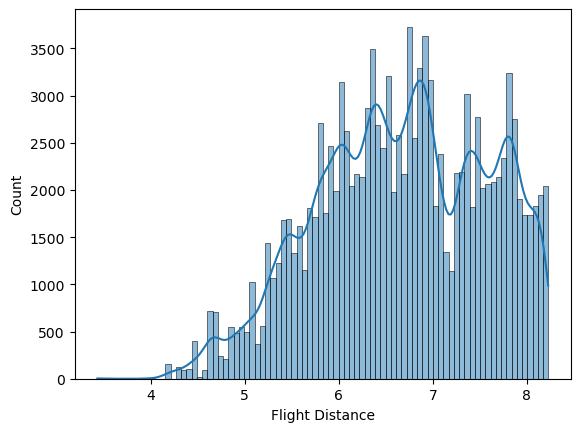

In [69]:
sns.histplot(np.log(df_no_outliers["Flight Distance"]),kde=True)

<Axes: xlabel='Flight Distance', ylabel='Count'>

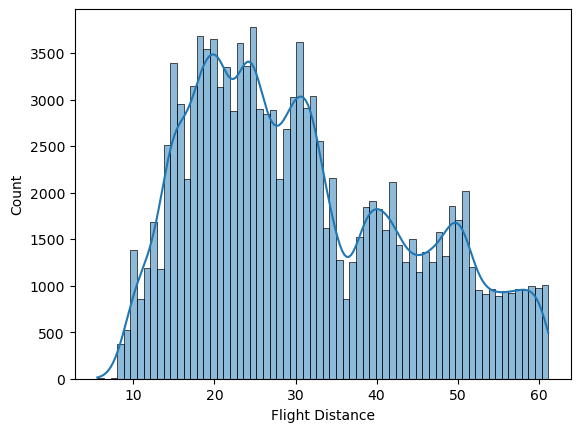

In [70]:
sns.histplot(np.sqrt(df_no_outliers["Flight Distance"]),kde=True)

<Axes: xlabel='Flight Distance', ylabel='Count'>

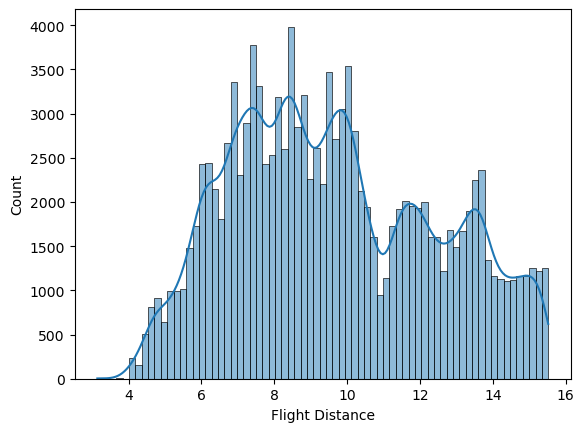

In [71]:
sns.histplot(np.cbrt(df_no_outliers["Flight Distance"]),kde=True)

In [72]:
np.cbrt(df_no_outliers["Flight Distance"])

0          9.363705
1          9.363705
2          9.483814
3         12.396478
4         15.139440
            ...    
129875     7.646027
129876     6.753313
129877     6.958943
129878     6.958943
129879     6.958943
Name: Flight Distance, Length: 127025, dtype: float64

In [73]:
df_no_outliers

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,0,0,821,0.033333,0.083333,3,3,4,...,5,5,5,3,5,5,Neutral or Dissatisfied,1,0,0
1,0,35,1,0,821,0.433333,0.650000,2,2,3,...,5,3,5,2,5,5,Satisfied,1,0,0
2,1,41,1,0,853,0.000000,0.000000,4,4,4,...,5,5,3,4,3,3,Satisfied,1,0,0
3,1,50,1,0,1905,0.000000,0.000000,2,2,3,...,4,4,5,2,5,5,Satisfied,1,0,0
4,0,49,1,0,3470,0.000000,0.016667,3,3,3,...,5,4,3,3,3,3,Satisfied,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,447,0.033333,0.050000,4,4,4,...,4,4,5,4,4,4,Neutral or Dissatisfied,0,0,1
129876,1,41,1,1,308,0.000000,0.000000,5,3,5,...,2,2,4,3,2,5,Neutral or Dissatisfied,0,0,1
129877,1,42,1,1,337,0.100000,0.233333,5,2,4,...,3,3,4,2,3,5,Neutral or Dissatisfied,0,0,1
129878,1,50,1,1,337,0.516667,0.366667,4,4,3,...,3,3,4,5,3,5,Satisfied,0,0,1


<Axes: xlabel='Age', ylabel='Count'>

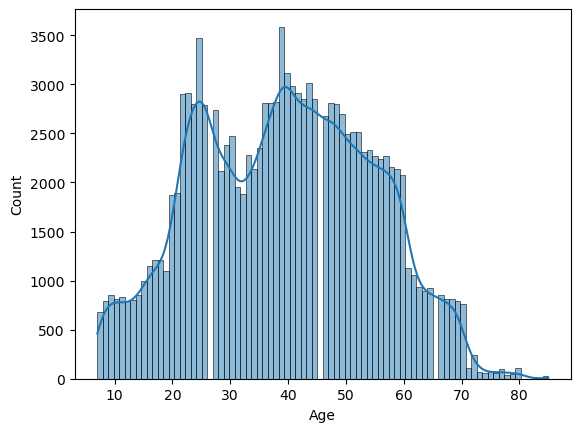

In [74]:
sns.histplot(df_no_outliers["Age"],kde=True)

In [75]:
df2=df_no_outliers.copy()

In [76]:
df2

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,0,0,821,0.033333,0.083333,3,3,4,...,5,5,5,3,5,5,Neutral or Dissatisfied,1,0,0
1,0,35,1,0,821,0.433333,0.650000,2,2,3,...,5,3,5,2,5,5,Satisfied,1,0,0
2,1,41,1,0,853,0.000000,0.000000,4,4,4,...,5,5,3,4,3,3,Satisfied,1,0,0
3,1,50,1,0,1905,0.000000,0.000000,2,2,3,...,4,4,5,2,5,5,Satisfied,1,0,0
4,0,49,1,0,3470,0.000000,0.016667,3,3,3,...,5,4,3,3,3,3,Satisfied,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,447,0.033333,0.050000,4,4,4,...,4,4,5,4,4,4,Neutral or Dissatisfied,0,0,1
129876,1,41,1,1,308,0.000000,0.000000,5,3,5,...,2,2,4,3,2,5,Neutral or Dissatisfied,0,0,1
129877,1,42,1,1,337,0.100000,0.233333,5,2,4,...,3,3,4,2,3,5,Neutral or Dissatisfied,0,0,1
129878,1,50,1,1,337,0.516667,0.366667,4,4,3,...,3,3,4,5,3,5,Satisfied,0,0,1


In [77]:
df2.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Flight Distance',
       'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Class_Business', 'Class_Economy', 'Class_Economy Plus'],
      dtype='object')

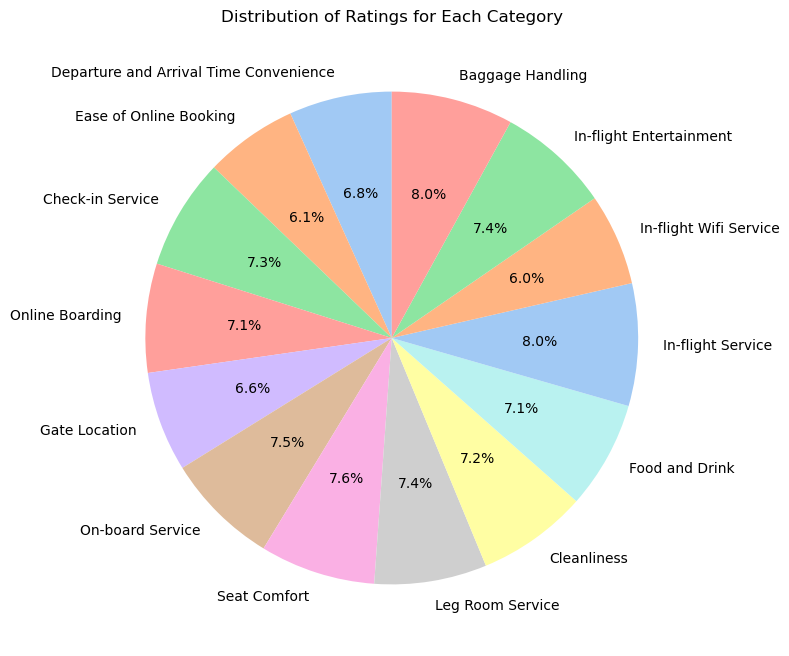

In [78]:
columns = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
           'Check-in Service', 'Online Boarding', 'Gate Location',
           'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
           'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
           'In-flight Entertainment', 'Baggage Handling']

# Create a new DataFrame containing only the specified columns
subset_df = df2[columns]

# Calculate the sum of ratings for each column
column_sums = subset_df.sum()

# Create a pie chart using Seaborn
plt.figure(figsize=(12, 8))
sns.set_palette("pastel")  # You can choose a different palette if needed
plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings for Each Category')
plt.show()


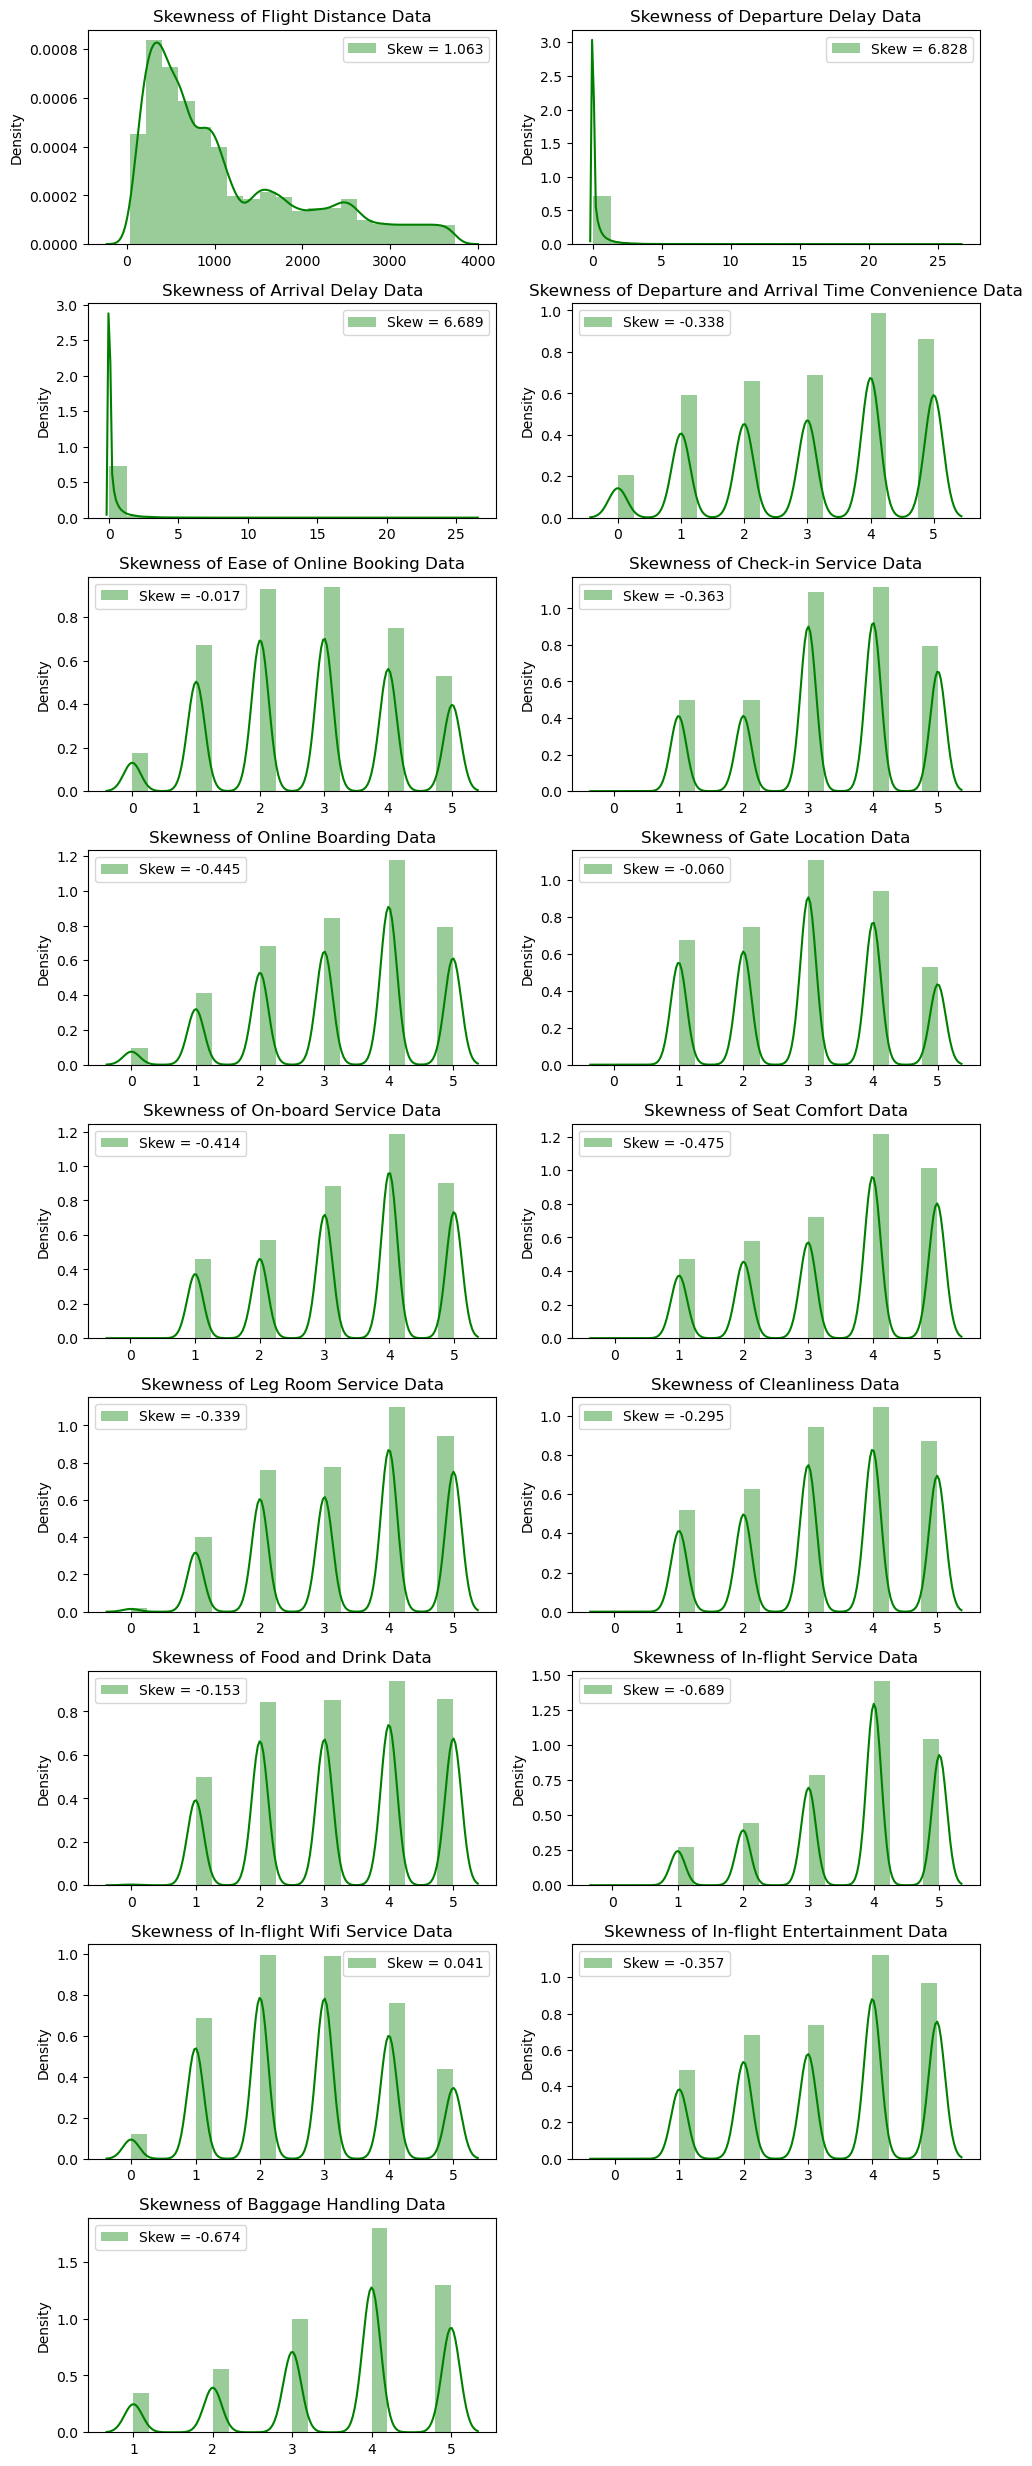

In [79]:
cols = df2[['Flight Distance','Departure Delay','Arrival Delay','Departure and Arrival Time Convenience', 'Ease of Online Booking',
           'Check-in Service', 'Online Boarding', 'Gate Location',
           'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
           'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
           'In-flight Entertainment', 'Baggage Handling']]
plt.figure(figsize = (10, 30))
for i, col in enumerate(cols, 1):
    plt.subplot(11, 2, i)
    skewness = df2[col].skew()
    sns.distplot(x = df2[col], label = "Skew = %.3f" %(skewness), kde = True, bins = 20,color="g")
    plt.legend(loc = "best")
    plt.title(f"Skewness of {col} Data")
    plt.tight_layout()
    plt.plot()

In [80]:
# the above graphs shows the departure and arrival delay as very much outliers

In [81]:
cols = df2[["Flight Distance","Departure Delay","Arrival Delay"]]
for col in cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    df_no_out = df2[(df2[col] >= (Q1 - 1.5*IQR)) & (df2[col] <= (Q3 + 1.5*IQR))]
df_no_out

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,0,0,821,0.033333,0.083333,3,3,4,...,5,5,5,3,5,5,Neutral or Dissatisfied,1,0,0
2,1,41,1,0,853,0.000000,0.000000,4,4,4,...,5,5,3,4,3,3,Satisfied,1,0,0
3,1,50,1,0,1905,0.000000,0.000000,2,2,3,...,4,4,5,2,5,5,Satisfied,1,0,0
4,0,49,1,0,3470,0.000000,0.016667,3,3,3,...,5,4,3,3,3,3,Satisfied,1,0,0
6,1,43,1,0,1963,0.000000,0.000000,3,3,4,...,4,5,5,3,5,5,Satisfied,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,447,0.033333,0.050000,4,4,4,...,4,4,5,4,4,4,Neutral or Dissatisfied,0,0,1
129876,1,41,1,1,308,0.000000,0.000000,5,3,5,...,2,2,4,3,2,5,Neutral or Dissatisfied,0,0,1
129877,1,42,1,1,337,0.100000,0.233333,5,2,4,...,3,3,4,2,3,5,Neutral or Dissatisfied,0,0,1
129878,1,50,1,1,337,0.516667,0.366667,4,4,3,...,3,3,4,5,3,5,Satisfied,0,0,1


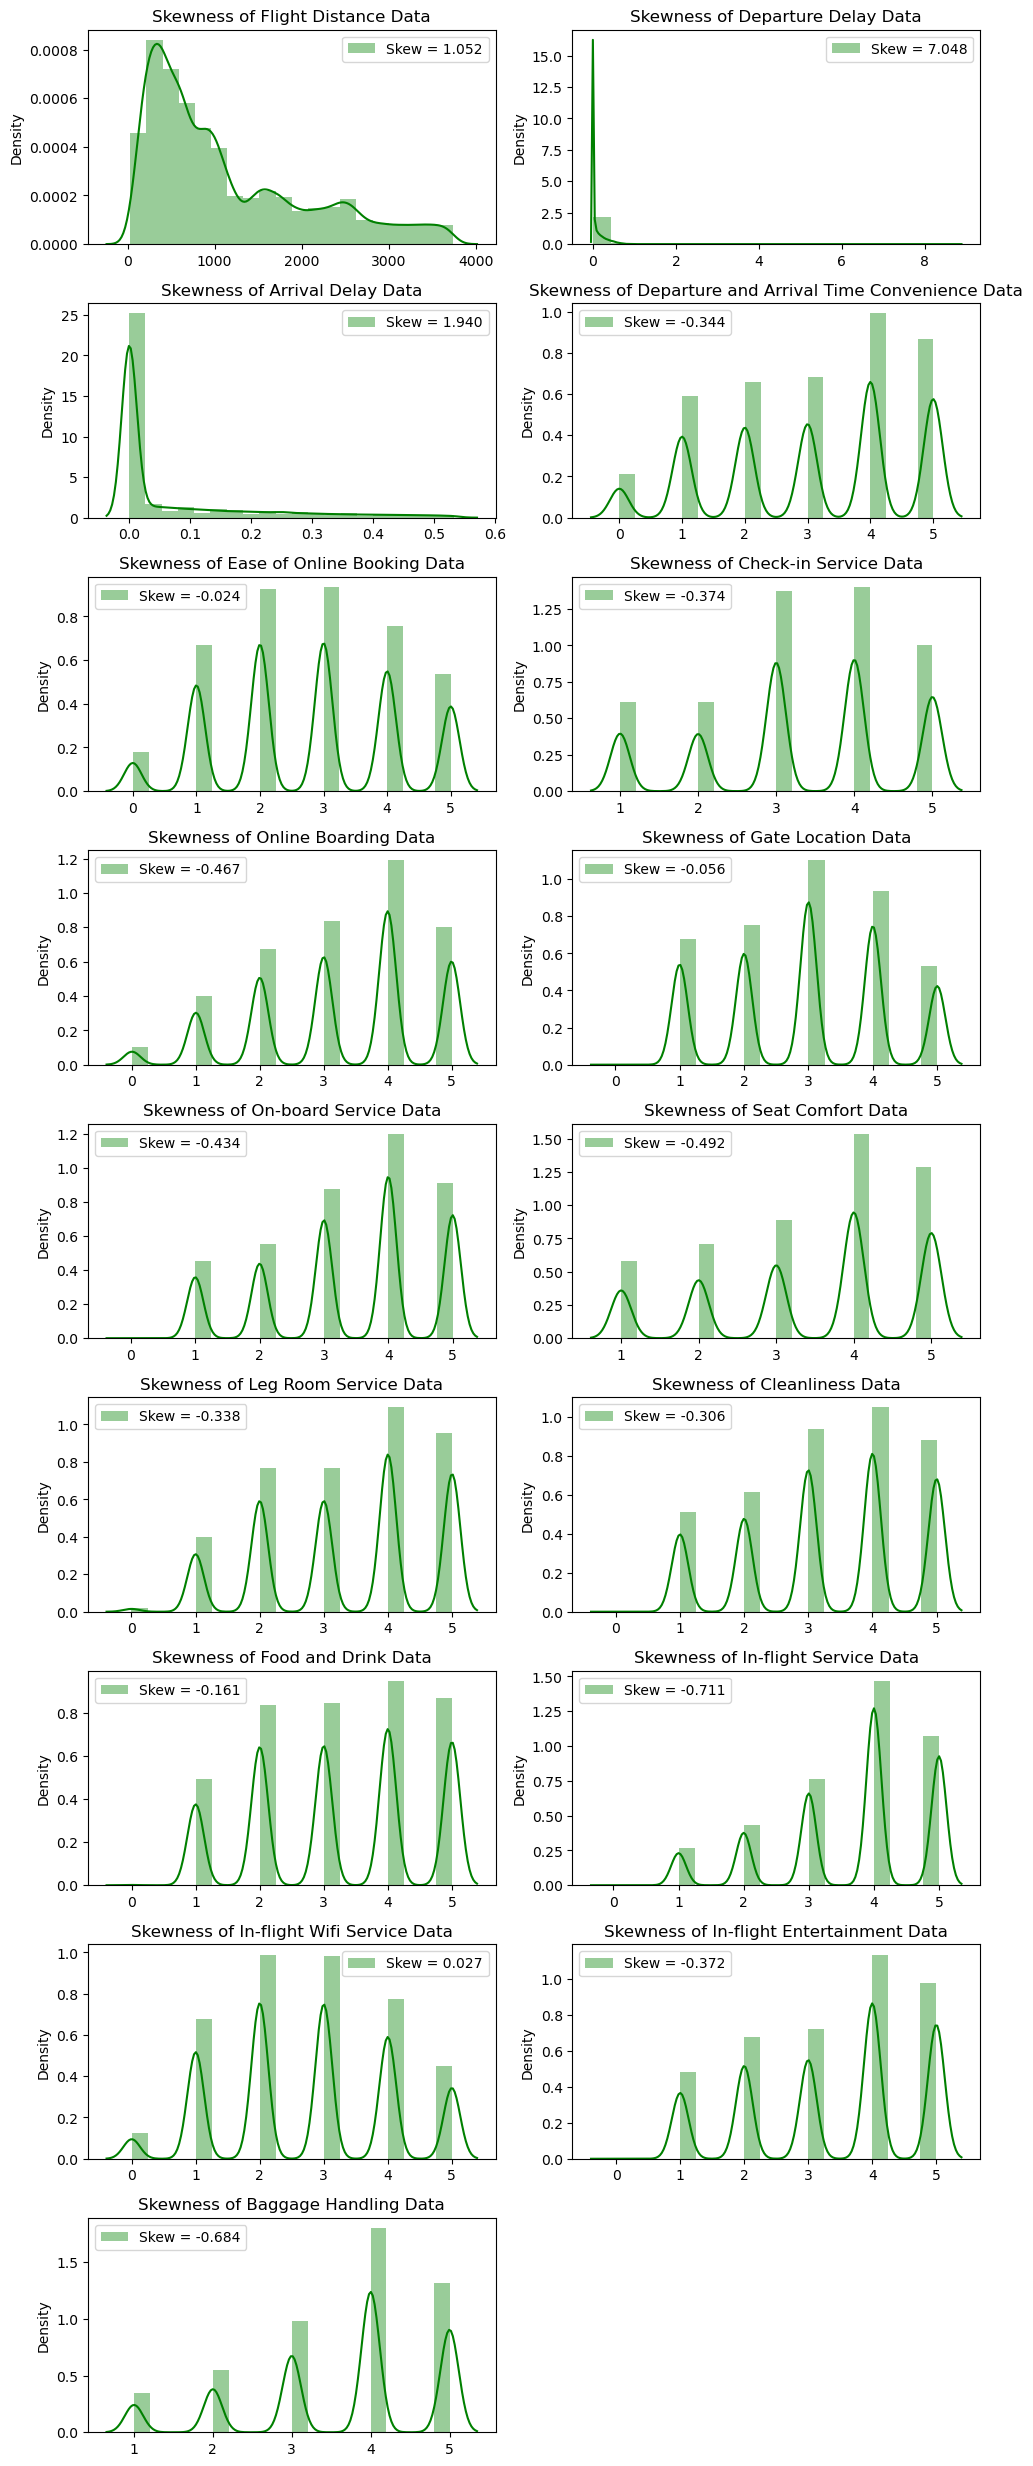

In [82]:
cols = df_no_out[['Flight Distance','Departure Delay','Arrival Delay','Departure and Arrival Time Convenience', 'Ease of Online Booking',
           'Check-in Service', 'Online Boarding', 'Gate Location',
           'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
           'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
           'In-flight Entertainment', 'Baggage Handling']]
plt.figure(figsize = (10, 30))
for i, col in enumerate(cols, 1):
    plt.subplot(11, 2, i)
    skewness = df_no_out[col].skew()
    sns.distplot(x = df_no_out[col], label = "Skew = %.3f" %(skewness), kde = True, bins = 20,color="g")
    plt.legend(loc = "best")
    plt.title(f"Skewness of {col} Data")
    plt.tight_layout()
    plt.plot()

In [83]:
df_no_out

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,0,0,821,0.033333,0.083333,3,3,4,...,5,5,5,3,5,5,Neutral or Dissatisfied,1,0,0
2,1,41,1,0,853,0.000000,0.000000,4,4,4,...,5,5,3,4,3,3,Satisfied,1,0,0
3,1,50,1,0,1905,0.000000,0.000000,2,2,3,...,4,4,5,2,5,5,Satisfied,1,0,0
4,0,49,1,0,3470,0.000000,0.016667,3,3,3,...,5,4,3,3,3,3,Satisfied,1,0,0
6,1,43,1,0,1963,0.000000,0.000000,3,3,4,...,4,5,5,3,5,5,Satisfied,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,447,0.033333,0.050000,4,4,4,...,4,4,5,4,4,4,Neutral or Dissatisfied,0,0,1
129876,1,41,1,1,308,0.000000,0.000000,5,3,5,...,2,2,4,3,2,5,Neutral or Dissatisfied,0,0,1
129877,1,42,1,1,337,0.100000,0.233333,5,2,4,...,3,3,4,2,3,5,Neutral or Dissatisfied,0,0,1
129878,1,50,1,1,337,0.516667,0.366667,4,4,3,...,3,3,4,5,3,5,Satisfied,0,0,1


In [84]:
df_no_out["Satisfaction"] = label_encoded_df.fit_transform(df_no_out["Satisfaction"])

In [85]:
df_no_out

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,0,0,821,0.033333,0.083333,3,3,4,...,5,5,5,3,5,5,0,1,0,0
2,1,41,1,0,853,0.000000,0.000000,4,4,4,...,5,5,3,4,3,3,1,1,0,0
3,1,50,1,0,1905,0.000000,0.000000,2,2,3,...,4,4,5,2,5,5,1,1,0,0
4,0,49,1,0,3470,0.000000,0.016667,3,3,3,...,5,4,3,3,3,3,1,1,0,0
6,1,43,1,0,1963,0.000000,0.000000,3,3,4,...,4,5,5,3,5,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,447,0.033333,0.050000,4,4,4,...,4,4,5,4,4,4,0,0,0,1
129876,1,41,1,1,308,0.000000,0.000000,5,3,5,...,2,2,4,3,2,5,0,0,0,1
129877,1,42,1,1,337,0.100000,0.233333,5,2,4,...,3,3,4,2,3,5,0,0,0,1
129878,1,50,1,1,337,0.516667,0.366667,4,4,3,...,3,3,4,5,3,5,1,0,0,1


In [86]:
# sns.histplot((df_no_out["Arrival Delay"]),kde=True,color="g")

In [87]:
x=df_no_out
y=df_no_out["Satisfaction"]

In [88]:
x.drop(["Satisfaction"],axis=1,inplace=True)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
ss = StandardScaler()

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=56)

In [93]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (87941, 24)
y_train: (87941,)
x_test: (21986, 24)
y_test: (21986,)


In [94]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc = RandomForestClassifier()

In [97]:
model = rfc.fit(x_train,y_train)

In [98]:
y_pred = model.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [100]:
accuracy_RF = accuracy_score(y_test, y_pred)
conf_matrix_RF = confusion_matrix(y_test, y_pred)
classification_rep_RF = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_RF)
print("\nConfusion Matrix:")
print(conf_matrix_RF)
print("\nClassification Report:")
print(classification_rep_RF)

Accuracy: 0.9587464750295642

Confusion Matrix:
[[12071   294]
 [  613  9008]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12365
           1       0.97      0.94      0.95      9621

    accuracy                           0.96     21986
   macro avg       0.96      0.96      0.96     21986
weighted avg       0.96      0.96      0.96     21986



In [101]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
abc = AdaBoostClassifier()

In [103]:
modelabc = abc.fit(x_train,y_train)

In [104]:
y_pred1 = model.predict(x_test)

In [105]:
accuracy_ADaBoost = accuracy_score(y_test, y_pred1)
conf_matrix_ADaBoost = confusion_matrix(y_test, y_pred1)
classification_rep_ADaBoost = classification_report(y_test, y_pred1)

# Print the evaluation metrics
print("Accuracy:", accuracy_ADaBoost)
print("\nConfusion Matrix:")
print(conf_matrix_ADaBoost)
print("\nClassification Report:")
print(classification_rep_ADaBoost)

Accuracy: 0.9587464750295642

Confusion Matrix:
[[12071   294]
 [  613  9008]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12365
           1       0.97      0.94      0.95      9621

    accuracy                           0.96     21986
   macro avg       0.96      0.96      0.96     21986
weighted avg       0.96      0.96      0.96     21986



In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
lr = LogisticRegression()

In [108]:
model_lr = lr.fit(x_train,y_train)

In [109]:
y_pred2 = model_lr.predict(x_test)

In [110]:
accuracy_LR = accuracy_score(y_test, y_pred2)
conf_matrix_LR = confusion_matrix(y_test, y_pred2)
classification_rep_LR = classification_report(y_test, y_pred2)

# Print the evaluation metrics
print("Accuracy:", accuracy_LR)
print("\nConfusion Matrix:")
print(conf_matrix_LR)
print("\nClassification Report:")
print(classification_rep_LR)

Accuracy: 0.8706904393705085

Confusion Matrix:
[[11091  1274]
 [ 1569  8052]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     12365
           1       0.86      0.84      0.85      9621

    accuracy                           0.87     21986
   macro avg       0.87      0.87      0.87     21986
weighted avg       0.87      0.87      0.87     21986



In [111]:
# from sklearn.svm import SVC

In [112]:
# svc_m = SVC()

In [101]:
# model_svm = svc_m.fit(x_train,y_train)

KeyboardInterrupt: 

In [113]:
# y_pred3 = model_svm.predict(x_test)

In [116]:
from sklearn.cluster import KMeans

In [117]:
km = KMeans()

In [118]:
model_km = km.fit(x_train,y_train)

In [120]:
y_pred4 = model_km.predict(x_test)

In [121]:
accuracy_km = accuracy_score(y_test, y_pred4)
conf_matrix_km = confusion_matrix(y_test, y_pred4)
classification_rep_km = classification_report(y_test, y_pred4)

# Print the evaluation metrics
print("Accuracy:", accuracy_km)
print("\nConfusion Matrix:")
print(conf_matrix_km)
print("\nClassification Report:")
print(classification_rep_km)

Accuracy: 0.10224688438096971

Confusion Matrix:
[[1907 2711  378  409 3008 1123  962 1867]
 [ 540  341 2708 3427 1188  419  418  580]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.15      0.26     12365
           1       0.11      0.04      0.05      9621
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.10     21986
   macro avg       0.11      0.02      0